# Logistic regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set plot style
sns.set_theme(style='darkgrid',palette='pastel')

In [3]:
# importing data set
data = pd.read_csv('births.csv')
data

,id,v2,lowbw,gestwks,preterm,matage,v7,sex,sexalph
0,1,2974,0,38.52,0.0,34,0,2,female
1,2,3270,0,NaN,NaN,30,0,1,male
2,3,2620,0,38.15,0.0,35,0,2,female
3,4,3751,0,39.80,0.0,31,0,1,male
4,5,3200,0,38.89,0.0,33,1,1,male
...,...,...,...,...,...,...,...,...,...
495,496,2852,0,38.45,0.0,28,0,2,female
496,497,3187,0,38.03,0.0,38,1,1,male
497,498,3054,0,38.50,0.0,26,0,2,female
498,499,3178,0,39.92,0.0,31,0,2,female


In [4]:
# display dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       500 non-null    int64  
 1   v2       500 non-null    int64  
 2   lowbw    500 non-null    int64  
 3   gestwks  490 non-null    float64
 4   preterm  490 non-null    float64
 5   matage   500 non-null    int64  
 6   v7       500 non-null    int64  
 7   sex      500 non-null    int64  
 8   sexalph  500 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 35.3+ KB


In [5]:
data.describe()

,id,v2,lowbw,gestwks,preterm,matage,v7,sex
count,500.000000,500.000000,500.000000,490.000000,490.000000,500.000000,500.000000,500.000000
mean,250.500000,3136.884000,0.120000,38.721857,0.128571,34.028000,0.144000,1.472000
std,144.481833,637.451485,0.325287,2.314167,0.335067,3.897897,0.351441,0.499715
min,1.000000,628.000000,0.000000,24.690000,0.000000,23.000000,0.000000,1.000000
25%,125.750000,2862.000000,0.000000,37.940000,0.000000,31.000000,0.000000,1.000000
50%,250.500000,3188.500000,0.000000,39.125000,0.000000,34.000000,0.000000,1.000000
75%,375.250000,3551.250000,0.000000,40.090000,0.000000,37.000000,0.000000,2.000000
max,500.000000,4553.000000,1.000000,43.160000,1.000000,43.000000,1.000000,2.000000


In [6]:
data.head(10)

,id,v2,lowbw,gestwks,preterm,matage,v7,sex,sexalph
0,1,2974,0,38.52,0.0,34,0,2,female
1,2,3270,0,NaN,NaN,30,0,1,male
2,3,2620,0,38.15,0.0,35,0,2,female
3,4,3751,0,39.80,0.0,31,0,1,male
4,5,3200,0,38.89,0.0,33,1,1,male
5,6,3673,0,40.97,0.0,33,0,2,female
6,7,3628,0,42.14,0.0,29,0,2,female
7,8,3773,0,40.21,0.0,37,0,1,male
8,9,3960,0,42.03,0.0,36,0,2,female
9,10,3405,0,39.33,0.0,39,0,1,male


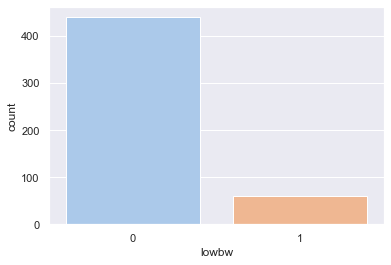

In [7]:
# count of low birth weight
sns.countplot(x='lowbw',data = data)
plt.show()

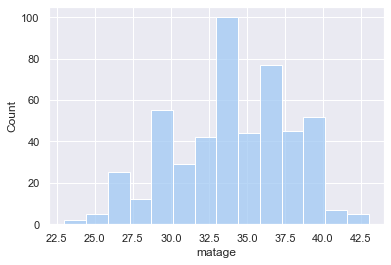

In [8]:
# plot of maternal age
sns.histplot(data = data, x="matage")
plt.show()

## Preprocessing

#### Drop unnecessary data and convert categorical to nuumbers

In [9]:
#remove unneeded data points
data.drop(['v2','v7','sex','id'],axis=1,inplace=True) 
data

,lowbw,gestwks,preterm,matage,sexalph
0,0,38.52,0.0,34,female
1,0,NaN,NaN,30,male
2,0,38.15,0.0,35,female
3,0,39.80,0.0,31,male
4,0,38.89,0.0,33,male
...,...,...,...,...,...
495,0,38.45,0.0,28,female
496,0,38.03,0.0,38,male
497,0,38.50,0.0,26,female
498,0,39.92,0.0,31,female


In [10]:
#find mean of gestwk and preterm
gest_mean = np.mean(data['gestwks'])
trm_mean = np.mean(data['preterm'])
print("Gestwks mean",gest_mean)
print("Preterm mean",trm_mean)

#round to 2 decimal place
gest_mean = np.round(gest_mean,2)
trm_mean = np.round(trm_mean,2)
print('\n')
print("Rounded Gestwks mean",gest_mean)
print("Rounded Preterm mean",trm_mean)

#replace NaN
data['gestwks'].fillna(gest_mean,inplace=True)
data['preterm'].fillna(trm_mean,inplace=True)
data

Gestwks mean 38.72185714285715
Preterm mean 0.12857142857142856


Rounded Gestwks mean 38.72
Rounded Preterm mean 0.13


,lowbw,gestwks,preterm,matage,sexalph
0,0,38.52,0.00,34,female
1,0,38.72,0.13,30,male
2,0,38.15,0.00,35,female
3,0,39.80,0.00,31,male
4,0,38.89,0.00,33,male
...,...,...,...,...,...
495,0,38.45,0.00,28,female
496,0,38.03,0.00,38,male
497,0,38.50,0.00,26,female
498,0,39.92,0.00,31,female


In [11]:
# clean data
sex=pd.get_dummies(data['sexalph'])
sex

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
495,1,0
496,0,1
497,1,0
498,1,0


In [12]:
#concatinate data to df
data=pd.concat([data,sex['male']],axis=1)
data

,lowbw,gestwks,preterm,matage,sexalph,male
0,0,38.52,0.00,34,female,0
1,0,38.72,0.13,30,male,1
2,0,38.15,0.00,35,female,0
3,0,39.80,0.00,31,male,1
4,0,38.89,0.00,33,male,1
...,...,...,...,...,...,...
495,0,38.45,0.00,28,female,0
496,0,38.03,0.00,38,male,1
497,0,38.50,0.00,26,female,0
498,0,39.92,0.00,31,female,0


In [13]:
# drop unneeded sexalph col
data.drop(['sexalph'],axis=1,inplace=True) 
data

,lowbw,gestwks,preterm,matage,male
0,0,38.52,0.00,34,0
1,0,38.72,0.13,30,1
2,0,38.15,0.00,35,0
3,0,39.80,0.00,31,1
4,0,38.89,0.00,33,1
...,...,...,...,...,...
495,0,38.45,0.00,28,0
496,0,38.03,0.00,38,1
497,0,38.50,0.00,26,0
498,0,39.92,0.00,31,0


In [14]:
#rename male to sex for convinence
data.rename(columns={'male': 'sex'}, inplace=True)
data

,lowbw,gestwks,preterm,matage,sex
0,0,38.52,0.00,34,0
1,0,38.72,0.13,30,1
2,0,38.15,0.00,35,0
3,0,39.80,0.00,31,1
4,0,38.89,0.00,33,1
...,...,...,...,...,...
495,0,38.45,0.00,28,0
496,0,38.03,0.00,38,1
497,0,38.50,0.00,26,0
498,0,39.92,0.00,31,0


#### Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
numeric = ['gestwks','preterm','matage']
scaler = StandardScaler()
scaler.fit(data[numeric])

StandardScaler()

In [17]:
print('Mean',scaler.mean_)
print('Varience',scaler.var_)

Mean [38.72182  0.1286  34.028  ]
Varience [ 5.23755249  0.10980004 15.163216  ]


In [18]:
scaled_inputs = scaler.transform(data[numeric])
scaled_inputs

array([[-8.81860738e-02, -3.88096494e-01, -7.19055431e-03],
       [-7.95256438e-04,  4.22500071e-03, -1.03441260e+00],
       [-2.49859086e-01, -3.88096494e-01,  2.49614957e-01],
       ...,
       [-9.69251556e-02, -3.88096494e-01, -2.06163464e+00],
       [ 5.23549648e-01, -3.88096494e-01, -7.77607087e-01],
       [-3.28510822e-01, -3.88096494e-01, -7.77607087e-01]])

In [21]:
scaled = pd.DataFrame(scaled_inputs, columns=['gestwks','preterm','matage'])
scaled = pd.concat([scaled,data['sex']],axis=1)
scaled = pd.concat([scaled,data['lowbw']],axis=1)
scaled

,gestwks,preterm,matage,sex,lowbw
0,-0.088186,-0.388096,-0.007191,0,0
1,-0.000795,0.004225,-1.034413,1,0
2,-0.249859,-0.388096,0.249615,0,0
3,0.471115,-0.388096,-0.777607,1,0
4,0.073487,-0.388096,-0.263996,1,0
...,...,...,...,...,...
495,-0.118773,-0.388096,-1.548024,0,0
496,-0.302294,-0.388096,1.020031,1,0
497,-0.096925,-0.388096,-2.061635,0,0
498,0.523550,-0.388096,-0.777607,0,0


## Creating Model

In [22]:
x = scaled.iloc[:,:-1].values
y = scaled.iloc[:,-1:].values
print("X",x)
print("Y",y[:5])

X [[-8.81860738e-02 -3.88096494e-01 -7.19055431e-03  0.00000000e+00]
 [-7.95256438e-04  4.22500071e-03 -1.03441260e+00  1.00000000e+00]
 [-2.49859086e-01 -3.88096494e-01  2.49614957e-01  0.00000000e+00]
 ...
 [-9.69251556e-02 -3.88096494e-01 -2.06163464e+00  0.00000000e+00]
 [ 5.23549648e-01 -3.88096494e-01 -7.77607087e-01  0.00000000e+00]
 [-3.28510822e-01 -3.88096494e-01 -7.77607087e-01  1.00000000e+00]]
Y [[0]
 [0]
 [0]
 [0]
 [0]]


In [23]:
# creating test and traning set
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

### Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression().fit(x_train, y_train.ravel())
model.coef_

array([[-1.8247153 ,  0.04489678, -0.12792692, -0.28998193]])

In [27]:
model.intercept_

array([-2.68458737])

In [28]:
y_pred = model.predict(x_test)

#### Performance

In [29]:
from sklearn import metrics

In [30]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[128   2]
 [ 12   8]]


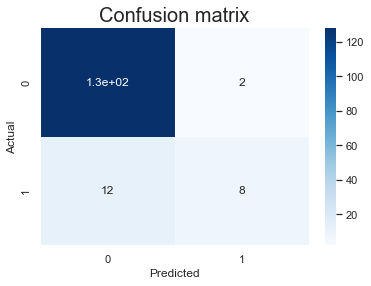

In [31]:
s=sns.heatmap(cm, annot=True, cmap='Blues')
s.set(xlabel='Predicted', ylabel='Actual')
s.set_title("Confusion matrix",fontsize =20)
plt.show()

In [32]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics. precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [33]:
print("Accuracy",accuracy)
print("Precision",precision)
print("Recall",recall)
print("F1",f1)

Accuracy 0.9066666666666666
Precision 0.8
Recall 0.4
F1 0.5333333333333333


### KNN

In [34]:
from sklearn.neighbors  import KNeighborsClassifier

In [35]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_pred = model.predict(x_test)

#### Performance

In [37]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[127   3]
 [ 11   9]]


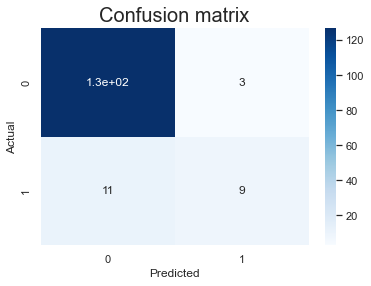

In [38]:
s=sns.heatmap(cm, annot=True, cmap='Blues')
s.set(xlabel='Predicted', ylabel='Actual')
s.set_title("Confusion matrix",fontsize =20)
plt.show()

In [39]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics. precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [40]:
print("Accuracy",accuracy)
print("Precision",precision)
print("Recall",recall)
print("F1",f1)

Accuracy 0.9066666666666666
Precision 0.75
Recall 0.45
F1 0.5625000000000001
